<a href="https://colab.research.google.com/github/YoshifumiMiyagi/RSV_analysis/blob/main/RSV(all_age).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:
SEED=42

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold,cross_val_score,cross_validate

In [181]:
excel_file = '/content/drive/MyDrive/BD IRA.xlsx'

df1 = pd.read_excel(excel_file, sheet_name='BD')

In [182]:
Df1 = df1[df1['Patient with a diagnosed chronic condition']=='No']
Df1.shape

(768, 91)

In [183]:
select = ['Age (months)', 'Gender ',
       'Medical insurance', 'Length of stay (Days)',
       'Meets criteria for clinical pneumonia',

       'Health history : Prior admission because of respiratory condition',
       'Health history : Prematurity                      ', 'Breastfeeding',
       'Age-appropriate vaccinations', 'Number of Hib vaccine doses received',
       'Number of pneumococcal vaccine doses received',
       'Number of antirotavirus vaccine doses received',

       'Previous history of antibiotic use in the 2 weeks leading up to the admission',
       'If yes. which antibiotics', 'If yes. who prescribed the antibiotics',
       'Diagnosis at admission', 'Known asthmatic patient',
       'Patient with a diagnosed chronic condition',
       'Duration of pain  before consultation (days)', 'History of fever',
       'Number of days with fever', 'History of vomiting',
       'Number of days of vomiting', 'History of diarrhea', 'History of cough',
       'History of rhinorrhea', 'Weight (Kg)', 'Height (cm)',
       'Unusual sleepiness', 'Oxygen saturation (SaO2) at admission',
       'Axillary temperature (°C)', 'Respiratory rate', 'Heart rate',
       'Paleness', 'Disorders of consciousness', 'Dehydration signs',
       'Confirmation of dehydration', 'Restlessness ', 'Cyanosis',
       'Nasal flaring', 'Laryngeal stridor', 'Rhonchi', 'Crackles', 'Wheezing',
       'Hypoventilation', 'Nasopharyngeal aspiration', 'Labored breathing',
       'Wood Downes score', 'Score interpretation', 'Blood sugar level',
       'Natremia', 'Kaliemia ', 'Creatinine Blood Test', 'Urea',
       'C-reactive protein', 'Procalcitonin', 'Oxygen Therapy',
       'Bronchodilators', 'Corticosteroid',
       'Antibiotherapy during hospitalization', 'Cloxacillin', 'Gentamicin',
       'Ampicillin', 'Cephalosporin', 'Amoxicillin/Clavulanic acid',
       'Chloramphenicol', 'Patient transferred to intensive care unit',
       'Length of stay in intensive care unit', 'Chest X-ray finding',
       'Pleural effusion', 'Location of pleural effusion', 'Main diagnostic ',
       'Clinical progression',
       'Blood culture results ',

       'Detection of DNA/RNA (TrueScience Respifinder Pathogen Identification Panel)                                                      Allele  1',
       'Detection of DNA/RNA (TrueScience Respifinder Pathogen Identification Panel)                                                        Allele  2',
       'Detection of DNA/RNA (TrueScience Respifinder Pathogen Identification Panel)                                              Allele  3',
       'Detection of DNA/RNA (TrueScience Respifinder Pathogen Identification Panel)                                               Allele  4',
       'Detection of DNA/RNA (TrueScience Respifinder Pathogen Identification Panel)                                             Allele  5']

DF1 = Df1[select]

In [184]:
mapping = {

    ' Rhinovirus': 'Rhino',
    ' CoronavirusesNL63': 'Corona',
    ' RSV-B': 'RSV',
    ' Adenovirus': 'Adeno',
    'Parainfluenza viruses 2': 'Parainfluenza',
    ' RSV-A': 'RSV',
    'Parainfluenza viruses 4': 'Parainfluenza',
    ' CoronavirusesOC43': 'Corona',
    'RSV-A': 'RSV',
    'Bordetella pertussis': 'Others',
    'Mycoplasma pneumonia': 'Others',
    ' Influenza A': 'Flu',
    'Parainfluenza viruses 1': 'Parainfluenza',
    ' Influenza B': 'Flu',
    'Parainfluenza viruses 3': 'Parainfluenza',
    'Human metapneumovirus': 'HMPV',
    'Rhinovirus': 'Rhino',
    'Adenovirus': 'Adeno',
    'Influenza A': 'Flu',
    ' N/A': 'Others',
    'N/A': 'Others'
}

# マッピング
DF1['Group1'] = Df1.iloc[:,-5].map(mapping).fillna('Others')
DF1['Group2'] = Df1.iloc[:,-4].map(mapping).fillna('Others')
DF1['Group3'] = Df1.iloc[:,-3].map(mapping).fillna('Others')
DF1['Group4'] = Df1.iloc[:,-2].map(mapping).fillna('Others')
DF1['Group5'] = Df1.iloc[:,-1].map(mapping).fillna('Others')

<ipython-input-184-493857f9fe93>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF1['Group1'] = Df1.iloc[:,-5].map(mapping).fillna('Others')
<ipython-input-184-493857f9fe93>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF1['Group2'] = Df1.iloc[:,-4].map(mapping).fillna('Others')
<ipython-input-184-493857f9fe93>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [185]:
all_labels = pd.unique(DF1.iloc[:,-5:].values.ravel())
target_labels = [label for label in all_labels if label != 'Others']
target_labels

['Rhino', 'Corona', 'RSV', 'Parainfluenza', 'Adeno', 'Flu', 'HMPV']

In [186]:
for label in target_labels:
    DF1[label] = DF1.apply(lambda row: int(label in row.values), axis=1)

<ipython-input-186-ffeb51edd5fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF1[label] = DF1.apply(lambda row: int(label in row.values), axis=1)
<ipython-input-186-ffeb51edd5fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF1[label] = DF1.apply(lambda row: int(label in row.values), axis=1)
<ipython-input-186-ffeb51edd5fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [187]:
DF1['RSV'].value_counts()

,count
RSV,
0,633
1,135


In [188]:
rsv_count = DF1['RSV'].value_counts().get(1, 0)

print(f"Number of rows where only 'RSV' is present among the target pathogens: {rsv_count}")

target_indicator_cols = [col for col in target_labels]

DF1['Target_Pathogen_Count'] = DF1[target_indicator_cols].sum(axis=1)
only_rsv_count = DF1[(DF1['Target_Pathogen_Count'] == 1) & (DF1['RSV'] == 1)].shape[0]
print(f"Number of rows where ONLY RSV is present among the target pathogens: {only_rsv_count}")

DF1 = DF1.drop(columns=['Target_Pathogen_Count'])

Number of rows where only 'RSV' is present among the target pathogens: 135
Number of rows where ONLY RSV is present among the target pathogens: 84


# RSV analysis

In [189]:
SELECT2 = ['Age (months)', 'Gender ',
       'Known asthmatic patient',

      # 'Number of days with fever',
           'History of vomiting',
      # 'Number of days of vomiting',
           'History of diarrhea', 'History of cough',
       'History of rhinorrhea', 'Weight (Kg)', 'Height (cm)',

       'Oxygen saturation (SaO2) at admission',
       'Axillary temperature (°C)', 'Respiratory rate', 'Heart rate',

       'Laryngeal stridor', 'Rhonchi', 'Crackles', 'Wheezing',
       #   'Labored breathing',

        # 'Blood sugar level',
        # 'Natremia', 'Kaliemia ', 'Creatinine Blood Test', 'Urea',
        # 'C-reactive protein', 'Procalcitonin',

       #'Oxygen Therapy','Bronchodilators', 'Corticosteroid',
       #'Antibiotherapy during hospitalization',

       # 'Patient transferred to intensive care unit',
       # 'Length of stay in intensive care unit',
       #'Chest X-ray finding',
       #'Pleural effusion',
       # 'Main diagnostic ',
       # 'Clinical progression',
       # 'Blood culture results ',

       #'Rhino'
           #,'Corona',
           'RSV'
           #'Parainfluenza',
           #'Adeno','Flu','HMPV'
          ]

# RDF = Rdf[SELECT2].dropna(subset=['Blood sugar level',
#        'Natremia', 'Kaliemia ', 'Creatinine Blood Test', 'Urea',
#        'C-reactive protein', 'Procalcitonin'])

COLUMNS = ['Age (months)', 'Gender ',
       'Known asthmatic patient',

      # 'Number of days with fever',
           'History of vomiting',
      # 'Number of days of vomiting',
           'History of diarrhea', 'History of cough',
       'History of rhinorrhea', 'Weight (Kg)', 'Height (cm)',

       'Oxygen saturation (SpO2) at admission',
       'Axillary temperature (°C)', 'Respiratory rate', 'Heart rate',

       'Laryngeal stridor', 'Rhonchi', 'Crackles', 'Wheezing',
       #    'Labored breathing',

        # 'Blood sugar level',
        # 'Natremia', 'Kaliemia ', 'Creatinine Blood Test', 'Urea',
        # 'C-reactive protein', 'Procalcitonin',

       #'Oxygen Therapy','Bronchodilators', 'Corticosteroid',
       #'Antibiotherapy during hospitalization',

       # 'Patient transferred to intensive care unit',
       # 'Length of stay in intensive care unit',
       #'Chest X-ray finding',
       #'Pleural effusion',
       # 'Main diagnostic ',
       # 'Clinical progression',
       # 'Blood culture results ',

       #'Rhino'
           #,'Corona',
           'RSV'
           #'Parainfluenza',
           #'Adeno','Flu','HMPV'
          ]

# RDF = Rdf[SELECT2].dropna(subset=['Blood sugar level',
#        'Natremia', 'Kaliemia ', 'Creatinine Blood Test', 'Urea',
#        'C-reactive protein', 'Procalcitonin'])

RDF = DF1[SELECT2]
RDF.columns = COLUMNS
RDF.shape

(768, 18)

In [190]:
SELECT2 = ['Age (months)', 'Gender ',
       'Known asthmatic patient',

      # 'Number of days with fever',
      #     'History of fever',
       #'Number of days with fever',
           'History of vomiting',
      # 'Number of days of vomiting',
           'History of diarrhea', 'History of cough',
       'History of rhinorrhea', 'Weight (Kg)', 'Height (cm)',

       'Oxygen saturation (SaO2) at admission',
       'Axillary temperature (°C)', 'Respiratory rate', 'Heart rate',

       'Laryngeal stridor', 'Rhonchi', 'Crackles', 'Wheezing',
       #   'Labored breathing',
       'Dehydration signs',
       #'Confirmation of dehydration', 'Restlessness ',
           'Cyanosis',
       'Nasal flaring',
       #'Blood sugar level',
       #'Natremia', 'Kaliemia ', 'Creatinine Blood Test', 'Urea',
       #'C-reactive protein', 'Procalcitonin',

       #'Oxygen Therapy','Bronchodilators', 'Corticosteroid',
       #'Antibiotherapy during hospitalization',

       # 'Patient transferred to intensive care unit',
       # 'Length of stay in intensive care unit',
       #'Chest X-ray finding',
       #'Pleural effusion',
       # 'Main diagnostic ',
       # 'Clinical progression',
       # 'Blood culture results ',

       #'Rhino'
           #,'Corona',
           'RSV'
           #'Parainfluenza',
           #'Adeno','Flu','HMPV'
          ]

# RDF = Rdf[SELECT2].dropna(subset=['Blood sugar level',
#        'Natremia', 'Kaliemia ', 'Creatinine Blood Test', 'Urea',
#        'C-reactive protein', 'Procalcitonin'])

COLUMNS = ['Age (months)', 'Gender ',
       'Known asthmatic patient',

      # 'Number of days with fever',
      #             'History of fever',
      # 'Number of days with fever',
           'History of vomiting',
      # 'Number of days of vomiting',
           'History of diarrhea', 'History of cough',
       'History of rhinorrhea', 'Weight (Kg)', 'Height (cm)',

       'Oxygen saturation (SpO2) at admission',
       'Axillary temperature (°C)', 'Respiratory rate', 'Heart rate',

       'Laryngeal stridor', 'Rhonchi', 'Crackles', 'Wheezing',
       #    'Labored breathing',
       'Dehydration signs',
       #'Confirmation of dehydration', 'Restlessness ',
           'Cyanosis',
       'Nasal flaring',
       #'Blood sugar level',
       #'Natremia', 'Kaliemia ', 'Creatinine Blood Test', 'Urea',
       #'C-reactive protein', 'Procalcitonin',

       #'Oxygen Therapy','Bronchodilators', 'Corticosteroid',
       #'Antibiotherapy during hospitalization',

       # 'Patient transferred to intensive care unit',
       # 'Length of stay in intensive care unit',
       #'Chest X-ray finding',
       #'Pleural effusion',
       # 'Main diagnostic ',
       # 'Clinical progression',
       # 'Blood culture results ',

       #'Rhino'
           #,'Corona',
           'RSV'
           #'Parainfluenza',
           #'Adeno','Flu','HMPV'
          ]

# RDF = Rdf[SELECT2].dropna(subset=['Blood sugar level',
#        'Natremia', 'Kaliemia ', 'Creatinine Blood Test', 'Urea',
#        'C-reactive protein', 'Procalcitonin'])

RDF = DF1[SELECT2]
RDF.columns = COLUMNS
RDF.shape

(768, 21)

In [191]:
X = RDF.iloc[:,:-1]
#X['Labored breathing'] = X['Labored breathing'].apply(lambda x: 0 if pd.isna(x) else 1)
y = RDF.iloc[:,-1]
y.value_counts()

,count
RSV,
0,633
1,135


In [192]:

from sklearn.preprocessing import LabelEncoder

# object型の列を選ぶ
obj_cols = X.select_dtypes(include='object').columns

# 各列をLabel Encoding
le_dict = {}
for col in obj_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    le_dict[col] = le

# FE

In [193]:
# # prompt: feature engineering def分

# def FE(df):
#     df['RS_score'] = np.log(df['Weight (Kg)']+10)
#     df['physical condition'] = df['Oxygen saturation (SpO2) at admission'] *  df['Weight (Kg)'] * (1/df['Heart rate']) * (1/df['Respiratory rate'])
#     df['physical condition_2'] = df['Oxygen saturation (SpO2) at admission'] +  df['Weight (Kg)'] - df['Heart rate'] - df['Respiratory rate']
#     df['Respiratory_score'] = (df['Heart rate'] + df['Respiratory rate'] ) / (df['Oxygen saturation (SpO2) at admission'] + df['Weight (Kg)'])



#     df['SpO2_rhonchi'] = df.apply(lambda row: row['Oxygen saturation (SpO2) at admission'] - 2if row['Rhonchi'] == 1 else row['Oxygen saturation (SpO2) at admission'], axis=1)
#     df['SpO2_crackles'] = df.apply(lambda row: row['Oxygen saturation (SpO2) at admission'] - 2 if row['Crackles'] == 1 else row['Oxygen saturation (SpO2) at admission'], axis=1)

#     df['SpO2_wheeze'] = df.apply(lambda row: row['Oxygen saturation (SpO2) at admission'] - 5 if row['Wheezing'] == 1 else row['Oxygen saturation (SpO2) at admission'], axis=1)
#     df['SpO2_stridor'] = df.apply(lambda row: row['Oxygen saturation (SpO2) at admission'] - 5 if row['Laryngeal stridor'] == 1 else row['Oxygen saturation (SpO2) at admission'], axis=1)
#     df['SpO2_rhonchi'] = df.apply(lambda row: row['Oxygen saturation (SpO2) at admission'] - 5if row['Rhonchi'] == 1 else row['Oxygen saturation (SpO2) at admission'], axis=1)
#     df['SpO2_crackles'] = df.apply(lambda row: row['Oxygen saturation (SpO2) at admission'] - 5 if row['Crackles'] == 1 else row['Oxygen saturation (SpO2) at admission'], axis=1)

#     df['physical condition'] = df['SpO2_wheeze'] *  df['Weight (Kg)'] * (1/df['Heart rate']) * (1/df['Respiratory rate'])
#     df['Respiratory_score'] = (df['Heart rate'] + df['Respiratory rate']) / (df['SpO2_wheeze'] + df['Weight (Kg)'])
#     df['Age*Weight'] = df['Age (months)'] * df['Weight (Kg)']
#     df['Age*Height'] = df['Age (months)'] * df['Height (cm)']
#     df['murmur'] = ((df['Wheezing'] == 1) | (df['Rhonchi'] == 1)).astype(int)
#     df['Heart rate (normalized by weight)'] = df['Heart rate'] / df['Weight (Kg)']
#     df['Respiratory rate (normalized by weight)'] = df['Respiratory rate'] / df['Weight (Kg)']

#     df['physical condition'] = df['Oxygen saturation (SpO2) at admission'] *  df['Weight (Kg)'] * (1/df['Heart rate (normalized by weight)']) * (1/df['Respiratory rate (normalized by weight)'])
#     df['physical condition'] = df['Oxygen saturation (SpO2) at admission'] * df['Age (months)'] * df['Heart rate'] * df['Respiratory rate']
#     df['Kaup'] = df['Weight (Kg)'] / ((df['Height (cm)'] / 100) ** 2)
#     df['SpO2 ratio_1'] =  df['Weight (Kg)'] / df['Oxygen saturation (SpO2) at admission']
#     df['SpO2 ratio_2'] =  df['Weight (Kg)'] / df['Age (months)']
#     df['SpO2 ratio_3'] =  df['Weight (Kg)'] / df['Respiratory rate']

#     df['SpO2 ratio_6'] =  ((df['Heart rate']*df['Respiratory rate'])) / df['Weight (Kg)']

#     df['SpO2 ratio_7'] =  df['Oxygen saturation (SpO2) at admission'] / df['Age (months)']
#     df['SpO2 ratio_8'] =   df['Oxygen saturation (SpO2) at admission'] / df['Respiratory rate']

#     df['SpO2 ratio_9'] =  (df['Heart rate']) / df['Age (months)']
#     df['SpO2 ratio_8'] =  (df['Respiratory rate']) / df['Age (months)']

#     df['SpO2 ratio_9'] =  (df['Heart rate']) / df['Age (months)']
#     df['SpO2 ratio_10'] = df['Respiratory rate'] * df['Age (months)']
#     df['AB'] =   np.log(df['Age (months)'] +5) * df['Weight (Kg)']
#     df['vital'] =  df['Respiratory rate'] + df['Heart rate'] + (df['Axillary temperature (°C)'] *10)
#     df['WS'] = df['Weight (Kg)'] * df['Oxygen saturation (SpO2) at admission']
#     df['HR'] = df['Heart rate'] * df['Oxygen saturation (SpO2) at admission']
#     df['RR'] = df['Respiratory rate'] * df['Oxygen saturation (SpO2) at admission']

#     return df

In [194]:
# # prompt: ['Oxygen saturation (SpO2) at admission']の値をLabored breathingのとき-20,Crackleのとき-10、他-5

# def FE2(df):
#     df['SpO2_adjusted'] = df['Oxygen saturation (SpO2) at admission'].copy()

#     #df.loc[df['Labored breathing'] == 1, 'SpO2_adjusted'] -= 20
#     df.loc[df['Wheezing'] == 1, 'SpO2_adjusted'] -= 10
#     df.loc[(df['Laryngeal stridor'] == 1) , 'SpO2_adjusted'] -= 5
#     df.loc[(df['Rhonchi'] == 1) , 'SpO2_adjusted'] -= 5
#     df.loc[(df['Crackles'] == 1) , 'SpO2_adjusted'] -= 5

#     # 以下、元のFE関数の他の特徴量エンジニアリングのコードを維持したい場合はここに追記
#     # df['SpO2_wheeze'] = df.apply(lambda row: row['Oxygen saturation (SpO2) at admission'] - 5 if row['Wheezing'] == 1 else row['Oxygen saturation (SpO2) at admission'], axis=1)
#     # df['SpO2_stridor'] = df.apply(lambda row: row['Oxygen saturation (SpO2) at admission'] - 5 if row['Laryngeal stridor'] == 1 else row['Oxygen saturation (SpO2) at admission'], axis=1)
#     # df['SpO2_rhonchi'] = df.apply(lambda row: row['Oxygen saturation (SpO2) at admission'] - 5if row['Rhonchi'] == 1 else row['Oxygen saturation (SpO2) at admission'], axis=1)

#     return df


In [195]:
# X2 = X.copy()
# X = FE(X2)
# #X = FE2(X2)

# ML

In [196]:
!pip install catboost

In [197]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score
import shap

from catboost import CatBoostClassifier, Pool


✅ Fold 1
Accuracy: 0.7468 | AUC: 0.8370

✅ Fold 2
Accuracy: 0.7532 | AUC: 0.7262

✅ Fold 3
Accuracy: 0.6883 | AUC: 0.7352

✅ Fold 4
Accuracy: 0.7778 | AUC: 0.8001

✅ Fold 5
Accuracy: 0.6667 | AUC: 0.7524


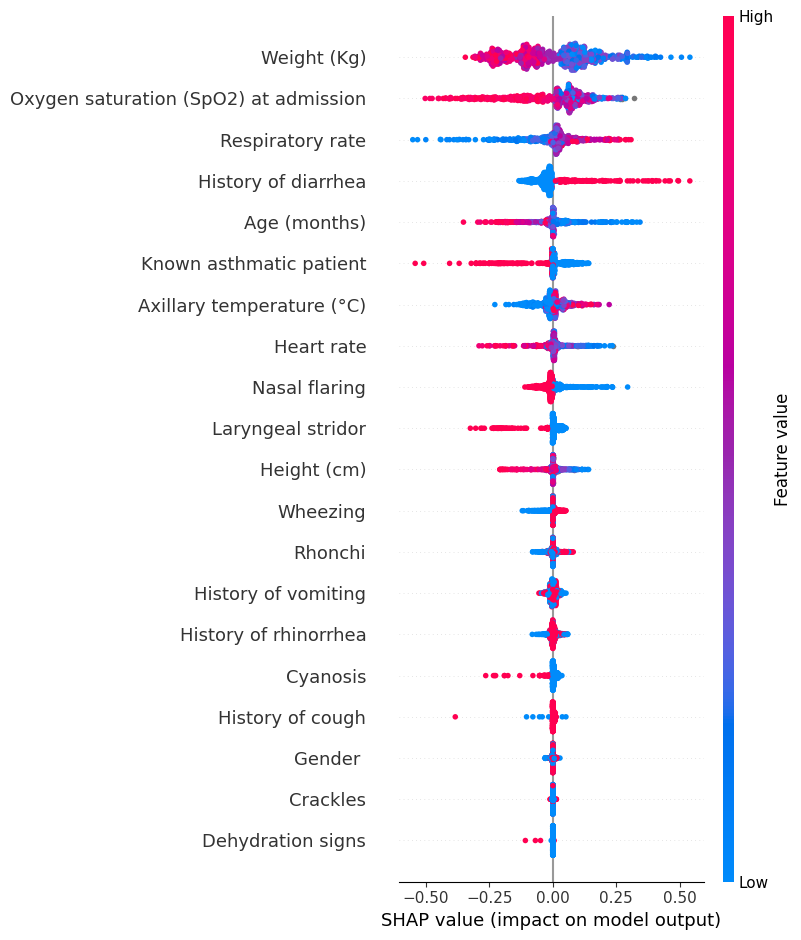


🎯 Mean Accuracy: 0.7266
🎯 Mean AUC: 0.7702


In [198]:
cat_features = ['Gender ', 'Known asthmatic patient', 'History of vomiting',
       'History of diarrhea', 'History of cough', 'History of rhinorrhea',
       'Laryngeal stridor', 'Rhonchi', 'Crackles', 'Wheezing',
                'Dehydration signs',
       #'Confirmation of dehydration', 'Restlessness ',
                'Cyanosis',
       'Nasal flaring'
              #  'murmur'
      # 'Labored breathing'
              # ,   'Chest X-ray finding',
      # 'Pleural effusion'
                ]

# 5-fold StratifiedCV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

shap_all = []  # SHAP値を蓄積
X_val_all = []  # 検証データを蓄積

acc_list = []
auc_list = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f'\n✅ Fold {fold + 1}')

    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # CatBoost用の Pool を作成
    train_pool = Pool(X_train, label=y_train, cat_features=cat_features)
    val_pool = Pool(X_val, label=y_val, cat_features=cat_features)

    # モデル設定
    model = CatBoostClassifier(
        #iterations=200,
        #learning_rate=0.1,
        #depth=3,
        eval_metric='AUC',
        random_seed=42,
        class_weights=[1, 5],
        verbose=0
    )

    # 学習
    model.fit(train_pool, eval_set=val_pool, early_stopping_rounds=20, verbose=False)

    # 予測
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1]

    acc = accuracy_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_pred_proba)

    print(f'Accuracy: {acc:.4f} | AUC: {auc:.4f}')

    acc_list.append(acc)
    auc_list.append(auc)

    # SHAP値（n_samples, n_features + 1）→ 最後の列はbase値
    shap_values = model.get_feature_importance(val_pool, type="ShapValues")
    shap_all.append(shap_values[:, :-1])
    X_val_all.append(X_val)

# 4. SHAP summary plot（全foldを合体して可視化）
shap_all_concat = np.vstack(shap_all)
X_val_concat = pd.concat(X_val_all, axis=0)

shap.summary_plot(shap_all_concat, X_val_concat, show=False)
plt.savefig('SHAP.png',format="png", dpi=900)
plt.show()


# 平均表示
print(f'\n🎯 Mean Accuracy: {np.mean(acc_list):.4f}')
print(f'🎯 Mean AUC: {np.mean(auc_list):.4f}')


In [199]:
X_val_concat.columns

Index(['Age (months)', 'Gender ', 'Known asthmatic patient',
       'History of vomiting', 'History of diarrhea', 'History of cough',
       'History of rhinorrhea', 'Weight (Kg)', 'Height (cm)',
       'Oxygen saturation (SpO2) at admission', 'Axillary temperature (°C)',
       'Respiratory rate', 'Heart rate', 'Laryngeal stridor', 'Rhonchi',
       'Crackles', 'Wheezing', 'Dehydration signs', 'Cyanosis',
       'Nasal flaring'],
      dtype='object')

In [200]:
shap_all_concat.shape

(768, 20)

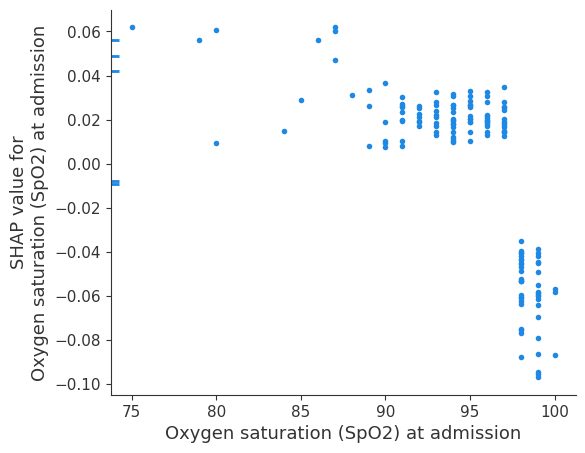

In [201]:
from scipy.signal import find_peaks

# X_val: 特徴量データ, shap_values: SHAP値 (model.get_feature_importance(type="ShapValues"))
# 例: 特徴名 'Oxygen saturation (SaO2) at admission'
feature_name = 'Oxygen saturation (SpO2) at admission'

# SHAP values には base value の列が含まれるため、最後の列を除外して特徴量に対応する SHAP 値のみを使用する
shap_values_features = shap_values[:, :-1]

shap.dependence_plot(
    feature_name,
    shap_values_features,  # shape = (n_samples, n_features)
    X_val,        # DataFrame
    interaction_index=None,  # 交互作用は今回不要
    show=True
)

In [202]:
# !pip install kneed
# from kneed import KneeLocator

In [203]:
# from kneed import KneeLocator
# import matplotlib.pyplot as plt
# import numpy as np

# # === 入力 ===
# #feature_name = 'SpO2'  # 任意の特徴量名（例）

# x_feat = X_val_concat[feature_name].values
# shap_feat = shap_all_concat[:, X_val_concat.columns.get_loc(feature_name)]

# # === 値を並び替えて変曲点（しきい値）を検出 ===
# sorted_idx = np.argsort(x_feat)
# x_sorted = x_feat[sorted_idx]
# y_sorted = shap_feat[sorted_idx]

# knee = KneeLocator(x_sorted, y_sorted, curve='concave', direction='decreasing')
# threshold = knee.knee

# # === 可視化 ===
# plt.figure(figsize=(5, 4))
# plt.scatter(x_sorted, y_sorted, alpha=0.4, label='SHAP')
# if threshold is not None:
#     plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold ≈ {threshold:.2f}')
#     plt.title(f"{feature_name} - Threshold: {threshold:.2f}")
# else:
#     plt.title(f"{feature_name} - No clear threshold")
# plt.xlabel(feature_name)
# plt.ylabel("SHAP Value")
# plt.legend()
# plt.tight_layout()
# plt.show()

# # === 出力 ===
# print(f"🔎 変曲点（{feature_name}のしきい値）: {threshold}")


In [204]:
# from sklearn.tree import DecisionTreeRegressor
# import numpy as np

# # X: SaO2の値, SHAP: SaO2に対するSHAP値
# # 例: X = X_val['Oxygen saturation (SaO2) at admission'].values.reshape(-1, 1)
# #      SHAP = shap_values[:, feature_index] （feature_indexはSaO2のインデックス）
# X= X_val['Oxygen saturation (SpO2) at admission'].values.reshape(-1, 1)
# SHAP = shap_all_concat[:, 10]
# # ソートしておく（dependence plotと同じ）
# sorted_idx = np.argsort(X.ravel())
# X_sorted = X[sorted_idx].reshape(-1, 1)
# SHAP_sorted = SHAP[sorted_idx]

# # 決定木で分割点を1つだけ学習（depth=1）
# tree = DecisionTreeRegressor(max_depth=1)
# tree.fit(X_sorted, SHAP_sorted)

# # しきい値（＝木の分割点）を取得
# threshold = tree.tree_.threshold[0]
# print(f"🩸 自動抽出されたSaO₂のしきい値: {threshold:.4f} %")


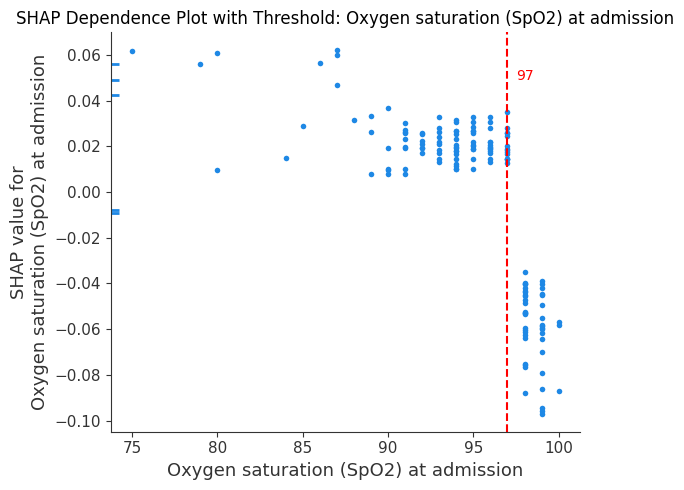

In [205]:
import shap
import matplotlib.pyplot as plt

# SHAPのdependenceプロット
feature = 'Oxygen saturation (SpO2) at admission'
shap.dependence_plot(
    feature_name,
    shap_values_features,  # shape = (n_samples, n_features)
    X_val,        # DataFrame
    interaction_index=None,  # 交互作用は今回不要
    show=None
)

# 閾値を表示（たとえば 94）
threshold = 97
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
plt.text(threshold + 0.5, plt.ylim()[1]*0.7, f"{threshold}", color='red')
plt.title(f"SHAP Dependence Plot with Threshold: {feature}")
#plt.legend()
plt.tight_layout()

plt.savefig('SpO2.png',format="png", dpi=900)
plt.show()


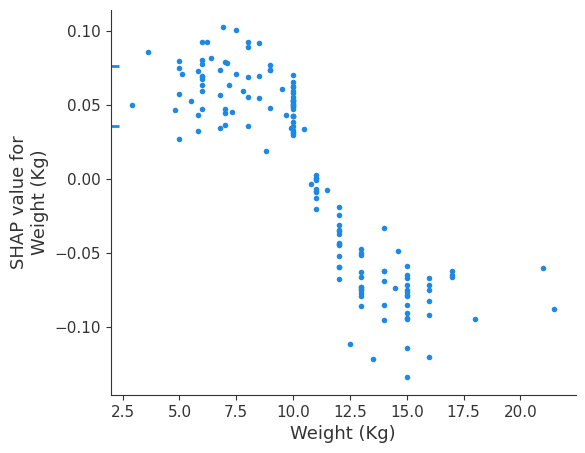

In [206]:

feature_name = 'Weight (Kg)'

# SHAP values には base value の列が含まれるため、最後の列を除外して特徴量に対応する SHAP 値のみを使用する
shap_values_features = shap_values[:, :-1]

shap.dependence_plot(
    feature_name,
    shap_values_features,  # shape = (n_samples, n_features)
    X_val,        # DataFrame
    interaction_index=None,  # 交互作用は今回不要
    show=True
)

In [207]:
# X= X_val['Weight (Kg)'].values.reshape(-1, 1)
# SHAP = shap_values[:, 9]
# # ソートしておく（dependence plotと同じ）
# sorted_idx = np.argsort(X.ravel())
# X_sorted = X[sorted_idx].reshape(-1, 1)
# SHAP_sorted = SHAP[sorted_idx]

# # 決定木で分割点を1つだけ学習（depth=1）
# tree = DecisionTreeRegressor(max_depth=1)
# tree.fit(X_sorted, SHAP_sorted)

# # しきい値（＝木の分割点）を取得
# threshold = tree.tree_.threshold[0]
# print(f"🩸 自動抽出された体重のしきい値: {threshold:.4f} kg")

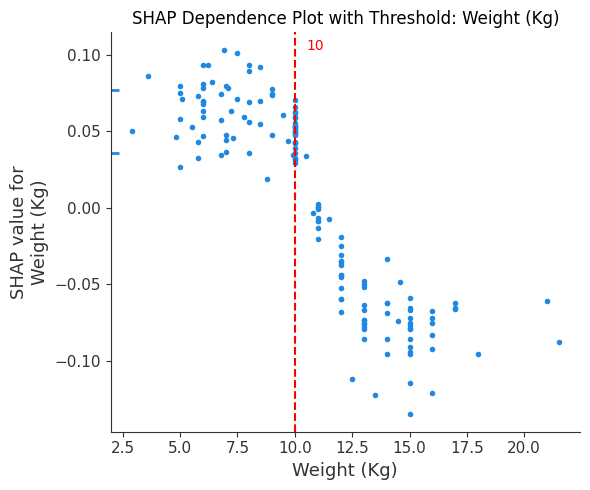

In [208]:
# SHAPのdependenceプロット
feature = 'Weight (Kg)'
shap.dependence_plot(
    feature_name,
    shap_values_features,  # shape = (n_samples, n_features)
    X_val,        # DataFrame
    interaction_index=None,  # 交互作用は今回不要
    show=None
)

# 閾値を表示（たとえば 94）
threshold = 10
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
plt.text(threshold + 0.5, plt.ylim()[1]*0.9, f"{threshold}", color='red')
plt.title(f"SHAP Dependence Plot with Threshold: {feature}")
#plt.legend()
plt.tight_layout()
plt.savefig('BW.png',format="png", dpi=900)
plt.show()

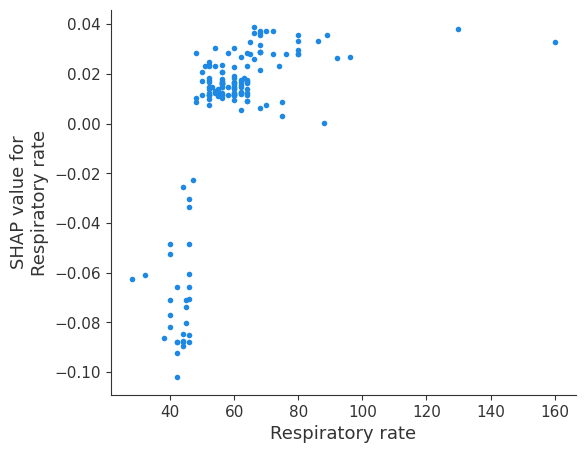

In [209]:

feature_name = 'Respiratory rate'

# SHAP values には base value の列が含まれるため、最後の列を除外して特徴量に対応する SHAP 値のみを使用する
shap_values_features = shap_values[:, :-1]

shap.dependence_plot(
    feature_name,
    shap_values_features,  # shape = (n_samples, n_features)
    X_val,        # DataFrame
    interaction_index=None,  # 交互作用は今回不要
    show=True
)

In [210]:
# X= X_val['Respiratory rate'].values.reshape(-1, 1)
# SHAP = shap_values[:, 12]
# # ソートしておく（dependence plotと同じ）
# sorted_idx = np.argsort(X.ravel())
# X_sorted = X[sorted_idx].reshape(-1, 1)
# SHAP_sorted = SHAP[sorted_idx]

# # 決定木で分割点を1つだけ学習（depth=1）
# tree = DecisionTreeRegressor(max_depth=1)
# tree.fit(X_sorted, SHAP_sorted)

# # しきい値（＝木の分割点）を取得
# threshold = tree.tree_.threshold[0]
# print(f"🩸 自動抽出された体重のしきい値: {threshold:f} kg")

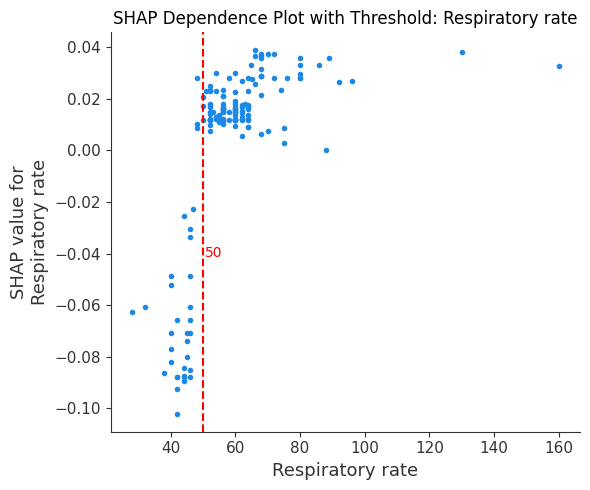

In [211]:
# SHAPのdependenceプロット
feature = 'Respiratory rate'
shap.dependence_plot(
    feature_name,
    shap_values_features,  # shape = (n_samples, n_features)
    X_val,        # DataFrame
    interaction_index=None,  # 交互作用は今回不要
    show=None
)

# 閾値を表示
threshold = 50
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
plt.text(threshold + 0.5, plt.ylim()[1]*-0.9, f"{threshold}", color='red')
plt.title(f"SHAP Dependence Plot with Threshold: {feature}")
#plt.legend()
plt.tight_layout()

plt.savefig('RR.png',format="png", dpi=900)
plt.show()

In [212]:

from sklearn.preprocessing import LabelEncoder
X = RDF.iloc[:,:-1]

y = RDF.iloc[:,-1]
# object型の列を選ぶ
obj_cols = X.select_dtypes(include='object').columns

# 各列をLabel Encoding
le_dict = {}
for col in obj_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    le_dict[col] = le


✅ Fold 1

✅ Fold 2

✅ Fold 3

✅ Fold 4

✅ Fold 5


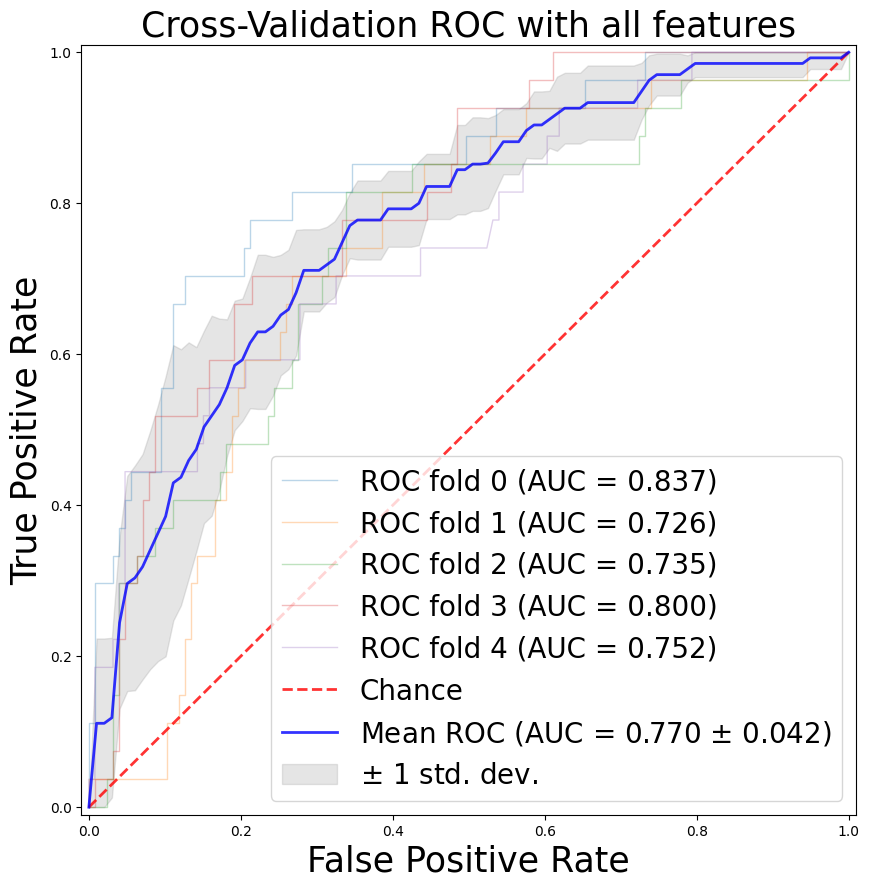

In [213]:
from sklearn.metrics import roc_curve, auc

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f'\n✅ Fold {fold + 1}')

    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # CatBoost用の Pool を作成
    train_pool = Pool(X_train, label=y_train, cat_features=cat_features)
    val_pool = Pool(X_val, label=y_val, cat_features=cat_features)

    # モデル設定
    model = CatBoostClassifier(
        #iterations=200,
        #learning_rate=0.1,
        #depth=3,
        eval_metric='AUC',
        class_weights=[1, 5],
        random_seed=42,
        verbose=0
    )

    # 学習
    model.fit(train_pool, eval_set=val_pool, early_stopping_rounds=20, verbose=False)

    # 予測
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1]

# for train, test in cv.split(X2, y):
#     probas_ = classifier.fit(X2.iloc[train], y[train]).predict_proba(X2.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.3f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.3f $\pm$ %0.3f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=25)
plt.ylabel('True Positive Rate',fontsize=25)
plt.title('Cross-Validation ROC with all features',fontsize=25)
plt.legend(loc="lower right", prop={'size': 20})

plt.savefig('all.png',format="png", dpi=900)

plt.show()

In [214]:
# !pip uninstall BorutaShap -y
# !pip install git+https://github.com/cbonet/Boruta-Shap.git@fix-bug-130

In [215]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import roc_auc_score
# from catboost import CatBoostClassifier
# from BorutaShap import BorutaShap


In [216]:
# selected_features_list = []
# auc_scores = []

# for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
#     X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
#     y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

#     selector = BorutaShap(model=model, importance_measure='shap', classification=True)
#     selector.fit(X=X_train, y=y_train, n_trials=50, random_state=42)

#     selected = selector.Subset().columns.tolist()
#     selected_features_list.append(selected)

#     model.fit(X_train[selected], y_train)
#     y_pred = model.predict_proba(X_val[selected])[:, 1]
#     auc = roc_auc_score(y_val, y_pred)
#     auc_scores.append(auc)

# # 結果表示
# result = pd.DataFrame({
#     "Fold": list(range(1, 6)),
#     "Selected Features": selected_features_list,
#     "AUC": auc_scores
# })
# print(result)

In [217]:
# selector.fit(X_train, y_train, n_trials=10, random_state=42)
# selector.plot(which_features='all', figsize=(16,12))
# selector.Subset()

In [218]:
# selector.plot(which_features='accepted', figsize=(6,6))

In [219]:
# import matplotlib.pyplot as plt
# from collections import Counter

# # selected_features_list に foldごとの特徴量リストが入っていると仮定
# # 例：[['feature_1', 'feature_2'], ['feature_2', 'feature_3'], ...]
# selected_features_list = [['Oxygen saturation (SpO2) at admission', 'Axillary temperature (°C)', 'Weight (Kg)', 'Respiratory rate'],
#                           ['Axillary temperature (°C)', 'Age (months)', 'Oxygen saturation (SpO2) at admission', 'Weight (Kg)', 'Respiratory rate', 'History of diarrhea'],
#                           ['Oxygen saturation (SpO2) at admission', 'Axillary temperature (°C)', 'Weight (Kg)', 'Wheezing'],
#                           ['Axillary temperature (°C)', 'Age (months)', 'Oxygen saturation (SpO2) at admission', 'Weight (Kg)', 'Respiratory rate'],
#                           ['Axillary temperature (°C)', 'Oxygen saturation (SpO2) at admission', 'Weight (Kg)', 'Respiratory rate', 'Wheezing']]
# # 全foldの特徴量をまとめる
# all_selected = [feat for fold_feats in selected_features_list for feat in fold_feats]

# # 出現回数をカウント
# feature_counts = Counter(all_selected)

# # データフレームにして頻度でソート
# stability_df = pd.DataFrame(feature_counts.items(), columns=["Feature", "Selection Count"])
# stability_df = stability_df.sort_values(by="Selection Count", ascending=False)

# # 可視化
# plt.figure(figsize=(10, 5))
# plt.barh(stability_df["Feature"], stability_df["Selection Count"])
# plt.gca().invert_yaxis()
# plt.xlabel("Number of folds selected")
# plt.title("Feature Selection Stability Across 5 Folds")
# plt.tight_layout()
# plt.show()


In [220]:
X = RDF.iloc[:,:-1]
y = RDF.iloc[:,-1]

from sklearn.preprocessing import LabelEncoder

# object型の列を選ぶ
obj_cols = X.select_dtypes(include='object').columns

# 各列をLabel Encoding
le_dict = {}
for col in obj_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    le_dict[col] = le

In [221]:
common = ['Weight (Kg)','Oxygen saturation (SpO2) at admission', 'Respiratory rate']


✅ Fold 1

✅ Fold 2

✅ Fold 3

✅ Fold 4

✅ Fold 5


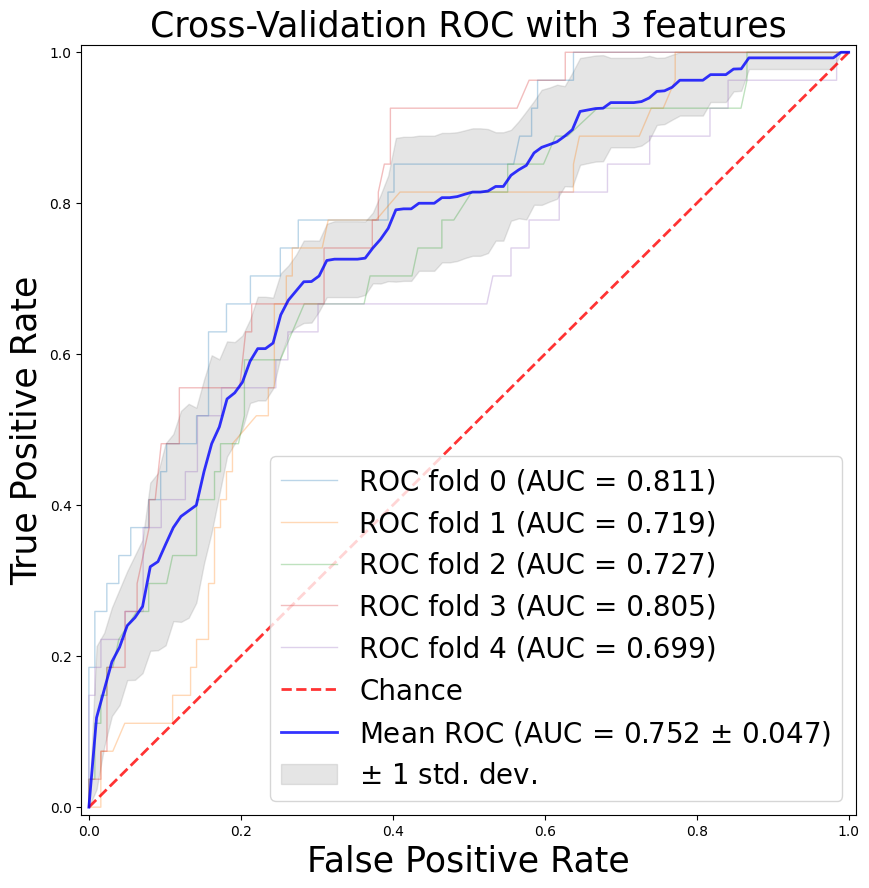

In [222]:
from sklearn.metrics import roc_curve, auc

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0

for fold, (train_idx, val_idx) in enumerate(skf.split(X[common], y)):
    print(f'\n✅ Fold {fold + 1}')

    X_train, X_val = X[common].iloc[train_idx], X[common].iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # CatBoost用の Pool を作成
    train_pool = Pool(X_train, label=y_train
                      #, cat_features=['Labored breathing']
                      )
    val_pool = Pool(X_val, label=y_val
                    #, cat_features=['Labored breathing']
                    )

    # モデル設定
    model = CatBoostClassifier(
        #iterations=200,
        #learning_rate=0.1,
        #depth=3,
        eval_metric='AUC',
        random_seed=42,
        #class_weights=[1, 5],
        verbose=0
    )

    # 学習
    model.fit(train_pool, eval_set=val_pool, early_stopping_rounds=20, verbose=False)

    # 予測
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1]

# for train, test in cv.split(X2, y):
#     probas_ = classifier.fit(X2.iloc[train], y[train]).predict_proba(X2.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.3f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.3f $\pm$ %0.3f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=25)
plt.ylabel('True Positive Rate',fontsize=25)
plt.title('Cross-Validation ROC with 3 features',fontsize=25)
plt.legend(loc="lower right", prop={'size': 20})

plt.savefig('3feat.png',format="png", dpi=900)

plt.show()

In [223]:
# DF1['Labored breathing'].unique()

In [224]:
DF2 = DF1.copy()
DF2 = DF2.dropna(subset=['Respiratory rate', 'Oxygen saturation (SaO2) at admission', 'Weight (Kg)'])
DF2['RSV'].value_counts()

,count
RSV,
0,608
1,124


In [225]:
import pandas as pd
def calculate_score(row):

  score = 0

  if row['Oxygen saturation (SaO2) at admission'] <= 97:
      score += 1
  if row['Weight (Kg)'] <= 10:
      score += 1
  if row['Respiratory rate'] >= 50:
      score += 1

  return score

DF2['Score'] = DF2.apply(calculate_score, axis=1)
print(DF2['Score'].value_counts().sort_index())
print(DF2.groupby('Score')['RSV'].value_counts(normalize=True).unstack().fillna(0))


Score
0     57
1    178
2    280
3    217
Name: count, dtype: int64
RSV           0         1
Score                    
0      0.964912  0.035088
1      0.943820  0.056180
2      0.871429  0.128571
3      0.649770  0.350230


In [226]:
from sklearn.metrics import confusion_matrix

y_true = DF2['RSV'] # 実際のRSV陽性 (1) か陰性 (0) か
y_pred_score_2plus = (DF2['Score'] >= 2).astype(int) # スコアが2点以上なら1、そうでなければ0

# 混同行列を計算
cm = confusion_matrix(y_true, y_pred_score_2plus)

# 混同行列からTP, TN, FP, FNを取得
# cmは [[TN, FP], [FN, TP]] の形式
TN, FP, FN, TP = cm.ravel()

# 感度 (Recall or True Positive Rate) = TP / (TP + FN)
sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0

# 特異度 (Specificity or True Negative Rate) = TN / (TN + FP)
specificity = TN / (TN + FP) if (TN + FP) != 0 else 0

print(f"スコアリングが2点以上のときの感度: {sensitivity:.4f}")
print(f"スコアリングが2点以上のときの特異度: {specificity:.4f}")

スコアリングが2点以上のときの感度: 0.9032
スコアリングが2点以上のときの特異度: 0.3668


In [228]:
from sklearn.metrics import confusion_matrix

y_true = DF2['RSV'] # 実際のRSV陽性 (1) か陰性 (0) か
y_pred_score_2plus = (DF2['Score'] >= 3).astype(int) # スコアが2点以上なら1、そうでなければ0

# 混同行列を計算
cm = confusion_matrix(y_true, y_pred_score_2plus)

# 混同行列からTP, TN, FP, FNを取得
# cmは [[TN, FP], [FN, TP]] の形式
TN, FP, FN, TP = cm.ravel()

# 感度 (Recall or True Positive Rate) = TP / (TP + FN)
sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0

# 特異度 (Specificity or True Negative Rate) = TN / (TN + FP)
specificity = TN / (TN + FP) if (TN + FP) != 0 else 0

print(f"スコアリングが3点以上のときの感度: {sensitivity:.4f}")
print(f"スコアリングが3点以上のときの特異度: {specificity:.4f}")

スコアリングが3点以上のときの感度: 0.6129
スコアリングが3点以上のときの特異度: 0.7681


スコアリングが1点以上のときの感度: 0.9839
スコアリングが1点以上のときの特異度: 0.0905


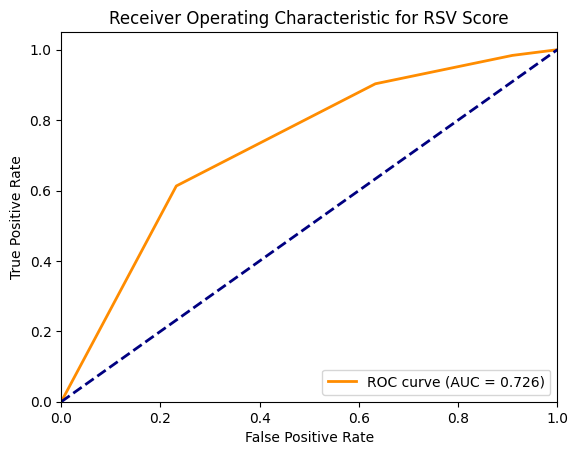

In [227]:
import matplotlib.pyplot as plt
# スコアが1点以上の患者を特定
y_pred_score_1plus = (DF2['Score'] >= 1).astype(int) # スコアが1点以上なら1、そうでなければ0

# 混同行列を計算
cm_1plus = confusion_matrix(y_true, y_pred_score_1plus)

# 混同行列からTP, TN, FP, FNを取得
# cmは [[TN, FP], [FN, TP]] の形式
TN_1plus, FP_1plus, FN_1plus, TP_1plus = cm_1plus.ravel()

# 感度 (Recall or True Positive Rate) = TP / (TP + FN)
sensitivity_1plus = TP_1plus / (TP_1plus + FN_1plus) if (TP_1plus + FN_1plus) != 0 else 0

# 特異度 (Specificity or True Negative Rate) = TN / (TN + FP)
specificity_1plus = TN_1plus / (TN_1plus + FP_1plus) if (TN_1plus + FP_1plus) != 0 else 0

print(f"スコアリングが1点以上のときの感度: {sensitivity_1plus:.4f}")
print(f"スコアリングが1点以上のときの特異度: {specificity_1plus:.4f}")

# スコアが1点以上のときのROCカーブとAUC
fpr_1plus, tpr_1plus, thresholds_1plus = roc_curve(y_true, DF2['Score']) # スコア自体を確率のように扱う
roc_auc_1plus = auc(fpr_1plus, tpr_1plus)

plt.figure()
plt.plot(fpr_1plus, tpr_1plus, color='darkorange', lw=2, label='ROC curve (AUC = %0.3f)' % roc_auc_1plus)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for RSV Score')
plt.legend(loc="lower right")
plt.savefig('RSVscore.png',format="png", dpi=900)
plt.show()


# Statictics

In [167]:
case = RDF[RDF['RSV'] ==1]
ctrl = RDF[RDF['RSV'] ==0]

In [175]:
ctrl['Nasal flaring'].value_counts()

,count
Nasal flaring,
Yes,465
No,168


In [170]:
case.describe()

,Age (months),Weight (Kg),Height (cm),Oxygen saturation (SpO2) at admission,Axillary temperature (°C),Respiratory rate,Heart rate,RSV
count,135.000000,134.000000,131.000000,125.000000,135.000000,135.000000,129.000000,135.0
mean,14.303704,9.107463,75.458015,93.824000,37.934815,63.377778,125.782946,1.0
std,12.750929,3.050740,13.676628,3.778257,0.868204,14.127810,22.335496,0.0
min,1.000000,3.200000,43.000000,82.000000,36.500000,40.000000,52.000000,1.0
25%,4.000000,7.000000,64.500000,92.000000,37.100000,54.000000,110.000000,1.0
50%,10.000000,9.000000,74.000000,95.000000,37.900000,60.000000,125.000000,1.0
75%,22.500000,10.650000,86.000000,96.000000,38.500000,68.000000,140.000000,1.0
max,55.000000,17.000000,105.000000,100.000000,40.000000,122.000000,184.000000,1.0


In [53]:
ctrl.describe()

,Age (months),Weight (Kg),Height (cm),Oxygen saturation (SpO2) at admission,Axillary temperature (°C),Respiratory rate,Heart rate,RSV
count,633.000000,630.000000,605.000000,611.000000,630.000000,633.000000,626.000000,633.0
mean,23.233807,11.477143,82.900661,95.073650,37.714603,55.930174,127.210863,0.0
std,15.721740,3.660047,14.865742,4.336593,0.886415,14.742910,23.959171,0.0
min,1.000000,2.900000,32.000000,68.000000,35.000000,21.000000,14.000000,0.0
25%,10.000000,9.000000,72.000000,94.000000,37.000000,48.000000,110.000000,0.0
50%,20.000000,11.000000,84.000000,96.000000,37.500000,56.000000,126.000000,0.0
75%,34.000000,14.500000,94.000000,98.000000,38.200000,60.000000,142.000000,0.0
max,78.000000,24.000000,118.000000,100.000000,42.000000,195.000000,190.000000,0.0


In [171]:
case.columns

Index(['Age (months)', 'Gender ', 'Known asthmatic patient',
       'History of vomiting', 'History of diarrhea', 'History of cough',
       'History of rhinorrhea', 'Weight (Kg)', 'Height (cm)',
       'Oxygen saturation (SpO2) at admission', 'Axillary temperature (°C)',
       'Respiratory rate', 'Heart rate', 'Laryngeal stridor', 'Rhonchi',
       'Crackles', 'Wheezing', 'Dehydration signs', 'Cyanosis',
       'Nasal flaring', 'RSV'],
      dtype='object')

In [55]:
case['Respiratory rate'].isnull()

,Respiratory rate
3,False
12,False
13,False
19,False
21,False
...,...
356,False
358,False
422,False
773,False


In [56]:
ctrl['History of cough'].value_counts()

,count
History of cough,
Yes,621
No,10


In [177]:
import pandas as pd
from scipy import stats

# 連続変数のt-test
continuous_vars = ['Age (months)', 'Weight (Kg)', 'Height (cm)',
                   'Oxygen saturation (SpO2) at admission', 'Axillary temperature (°C)',
                   'Respiratory rate', 'Heart rate'] # 適切な連続変数を選択

print("--- T-tests for continuous variables ---")
for col in continuous_vars:
    # 欠損値を除外
    case_data = case[col].dropna()
    ctrl_data = ctrl[col].dropna()

    if len(case_data) > 1 and len(ctrl_data) > 1: # t-testには少なくとも2つのデータが必要
        t_stat, p_value = stats.ttest_ind(case_data, ctrl_data, equal_var=False, nan_policy='omit') # Welch's t-test (unequal variance)
        print(f"Variable: {col}")
        print(f"  T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
    else:
        print(f"Variable: {col}")
        print("  Insufficient data to perform t-test.")

# カテゴリ変数のカイ二乗検定
categorical_vars = ['Gender ', 'Known asthmatic patient', 'History of vomiting',
                     'History of diarrhea', 'History of cough', 'History of rhinorrhea',
                     'Laryngeal stridor', 'Rhonchi', 'Crackles', 'Wheezing','Cyanosis','Nasal flaring'] # 適切なカテゴリ変数を選択

print("\n--- Chi-squared tests for categorical variables ---")
for col in categorical_vars:
    # クロス集計表を作成
    contingency_table = pd.crosstab(RDF[col], RDF['RSV'])

    # クロス集計表にゼロ行やゼロ列がないか確認
    if contingency_table.sum(axis=0).min() == 0 or contingency_table.sum(axis=1).min() == 0:
        print(f"Variable: {col}")
        print("  Skipping Chi-squared test due to zero counts in table.")
        continue

    # カイ二乗検定を実行
    chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
    print(f"Variable: {col}")
    print(f"  Chi-squared statistic: {chi2:.4f}, P-value: {p:.4f}")
    # print("  Contingency Table:")
    # print(contingency_table)


--- T-tests for continuous variables ---
Variable: Age (months)
  T-statistic: -7.0713, P-value: 0.0000
Variable: Weight (Kg)
  T-statistic: -7.8676, P-value: 0.0000
Variable: Height (cm)
  T-statistic: -5.5580, P-value: 0.0000
Variable: Oxygen saturation (SpO2) at admission
  T-statistic: -3.2820, P-value: 0.0012
Variable: Axillary temperature (°C)
  T-statistic: 2.6644, P-value: 0.0083
Variable: Respiratory rate
  T-statistic: 5.5177, P-value: 0.0000
Variable: Heart rate
  T-statistic: -0.6528, P-value: 0.5146

--- Chi-squared tests for categorical variables ---
Variable: Gender 
  Chi-squared statistic: 0.0000, P-value: 1.0000
Variable: Known asthmatic patient
  Chi-squared statistic: 12.7863, P-value: 0.0003
Variable: History of vomiting
  Chi-squared statistic: 6.3567, P-value: 0.0117
Variable: History of diarrhea
  Chi-squared statistic: 16.9501, P-value: 0.0000
Variable: History of cough
  Chi-squared statistic: 0.1222, P-value: 0.7266
Variable: History of rhinorrhea
  Chi-squar

In [176]:
# prompt: CoaghをFisherで

import pandas as pd
# Categorical variables for Fisher's exact test
categorical_vars_fisher = ['History of cough', 'Dehydration signs'] # 適切なカテゴリ変数を選択

print("\n--- Fisher's exact tests for categorical variables ---")
for col in categorical_vars_fisher:
    # クロス集計表を作成
    contingency_table = pd.crosstab(RDF[col], RDF['RSV'])

    # Fisherの正確検定を実行
    # scipy.stats.fisher_exact は2x2の分割表を想定しています。
    # もしカテゴリが3つ以上ある場合、適切な統計手法を選択する必要があります。
    # ここでは簡単のために、Fisher's exact testを適用できる2x2の場合を想定します。
    # それ以外の場合はメッセージを表示します。
    if contingency_table.shape == (2, 2):
        odd_ratio, p_value = stats.fisher_exact(contingency_table)
        print(f"Variable: {col}")
        print(f"  Fisher's Exact Test P-value: {p_value:.4f}")
        # print("  Contingency Table:")
        # print(contingency_table)
    else:
        print(f"Variable: {col}")
        print("  Skipping Fisher's exact test: Contingency table is not 2x2.")




--- Fisher's exact tests for categorical variables ---
Variable: History of cough
  Fisher's Exact Test P-value: 0.6994
Variable: Dehydration signs
  Fisher's Exact Test P-value: 1.0000


In [59]:
RDF['Age (months)'].describe()

,Age (months)
count,768.000000
mean,21.664062
std,15.609032
min,1.000000
25%,9.000000
50%,18.000000
75%,31.250000
max,78.000000
